In [72]:
#Libraries
import matplotlib.pyplot as plt
from shapely.ops import unary_union
import geopandas as gpd
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import haversine_distances

In [73]:
df = pd.read_excel(r"C:\Users\nunez\OneDrive\Escritorio\Bases\base_2012_2022_limpia.xlsx")
#MacOS
#df = pd.read_excel("/Users/santi/Desktop/Work/Bases/base_2012_2022_limpia.xlsx")

#Select 2022
df = df[df["ANIO"] == 2022]

#Geojson barrios caba
GeoJson_barrios = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson"
geojson = gpd.read_file(GeoJson_barrios)

#Point geometries from lat, long columns
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy( df["Longitud"], df["Latitud"]))

#Boundary of CABA
boundary = unary_union(geojson["geometry"]).exterior

#Removing al points outside of the boundary

# perform spatial join
joined = gpd.sjoin(gdf, geojson, op='within')

# filter out points that do not intersect with the boundary
points_within_boundary = joined[joined.index_right.notnull()]
points_within_boundary["TIPO_OBRA"] = points_within_boundary["TIPO_OBRA"].astype(str)
clean_df = points_within_boundary
clean_df["USO_1"].unique()

C:\Users\nunez\PycharmProjects\Permisos_de_obra\venv\lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\nunez\AppData\Local\Temp\ipykernel_7392\947364911.py:21: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined = gpd.sjoin(gdf, geojson, op='within')


array(['VIVIENDA MULTIFAMILIAR', 'SIN DATOS', 'VIVIENDA UNIFAMILIAR',
       'OTROS', 'SALUD', 'LOCAL COMERCIAL', 'OFICINAS', 'EDUCACION',
       'ENTRETENIMIENTO', 'GARAGE COMERCIAL', 'OFICINAS COMERCIALES',
       'ESTUDIOS PROFESIONALES', 'HOTEL', nan, 'USOS INDUSTRIALES',
       'HOTELERIA', 'COCHERAS', 'OFICINA COMERCIAL', 'DEPOSITO',
       'GALERIA COMERCIAL', 'COMERCIO USO UNICO', 'VIVENDA MULTIFAMILIAR'],
      dtype=object)

In [74]:
clean_df = clean_df[clean_df["TIPO_OBRA"] == "1"]
clean_df = clean_df[(clean_df["USO_1"] == "VIVIENDA UNIFAMILIAR") | (clean_df["USO_1"] == "VIVIENDA MULTIFAMILIAR")]
clean_df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ANIO,MES,TRIMESTRE,FECHA,DIRECCION,TIPO_OBRA,TIPO_OBRA_CUR,...,add,location,address,geometry,index_right,BARRIO,COMUNA_right,PERIMETRO,AREA,OBJETO
0,0,0.0,7,2022,1,1.0,3 ene 2022,GUARDIA VIEJA 3764,1,OBRA MAYOR,...,"GUARDIA VIEJA 3764 ALMAGRO Buenos Aires, Argen...",0.0,"GUARDIA VIEJA 3764 ALMAGRO Buenos Aires, Argen...",POINT (-58.41723 -34.60122),4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO
2,2,2.0,9,2022,3,1.0,3 mar 2022,RAWSON 276,1,Obra Mayor,...,"RAWSON 276 ALMAGRO Buenos Aires, Argentina",2.0,"RAWSON 276 ALMAGRO Buenos Aires, Argentina",POINT (-58.42628 -34.60916),4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO
4,4,4.0,11,2022,3,1.0,2 mar 2022,LAMBARE 847,1,OBRA MAYOR,...,"LAMBARE 847 ALMAGRO Buenos Aires, Argentina",4.0,"LAMBARE 847 ALMAGRO Buenos Aires, Argentina",POINT (-58.43047 -34.60510),4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO
5,5,5.0,12,2022,3,1.0,4 mar 2022,HUMAHUACA 3787,1,OBRA MAYOR,...,"HUMAHUACA 3787 ALMAGRO Buenos Aires, Argentina",5.0,"HUMAHUACA 3787 ALMAGRO Buenos Aires, Argentina",POINT (-58.41762 -34.60217),4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO
6,6,6.0,13,2022,2,1.0,1 feb 2022,SARMIENTO 4088,1,OBRA MAYOR,...,"SARMIENTO 4088 ALMAGRO Buenos Aires, Argentina",6.0,"SARMIENTO 4088 ALMAGRO Buenos Aires, Argentina",POINT (-58.42254 -34.60481),4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2694,2694,2694.0,2384,2022,9,3.0,NaN,SUPERI 2736,1,Obra Menor,...,"SUPERI 2736 COGHLAN Buenos Aires, Argentina",2694.0,"SUPERI 2736 COGHLAN Buenos Aires, Argentina",POINT (-58.47162 -34.56217),21,COGHLAN,12.0,4627.563131,1.279951e+06,BARRIO
3058,3058,3058.0,2672,2022,12,4.0,2022-12-23 00:00:00,IBERA 3895,1,Obra Media,...,"IBERA 3895 COGHLAN Buenos Aires, Argentina",3058.0,"IBERA 3895 COGHLAN Buenos Aires, Argentina",POINT (-58.47891 -34.56129),21,COGHLAN,12.0,4627.563131,1.279951e+06,BARRIO
3060,3060,3060.0,2674,2022,12,4.0,2022-12-21 00:00:00,AV. DOCTOR RICARDO BALBIN 3286,1,Obra Media,...,AV. DOCTOR RICARDO BALBIN 3286 COGHLAN Buenos ...,3060.0,AV. DOCTOR RICARDO BALBIN 3286 COGHLAN Buenos ...,POINT (-58.47709 -34.55787),21,COGHLAN,12.0,4627.563131,1.279951e+06,BARRIO
3061,3061,3061.0,2675,2022,12,4.0,2022-12-16 00:00:00,MELIAN 2634,1,Obra Menor,...,"MELIAN 2634 COGHLAN Buenos Aires, Argentina",3061.0,"MELIAN 2634 COGHLAN Buenos Aires, Argentina",POINT (-58.47228 -34.56447),21,COGHLAN,12.0,4627.563131,1.279951e+06,BARRIO


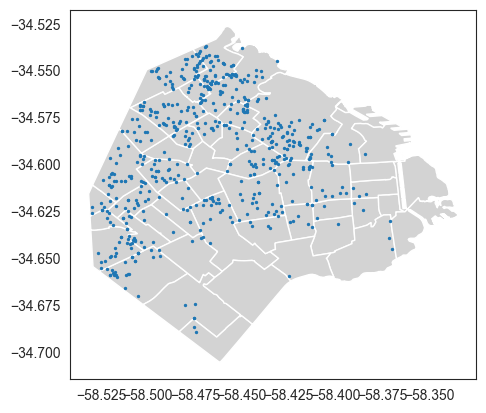

In [75]:
fig, ax = plt.subplots()
geojson["geometry"].plot(ax=ax, color='lightgrey')
clean_df.plot(ax=ax, markersize=2)
#points_within_boundary.plot(ax=ax, markersize=2)
plt.show()

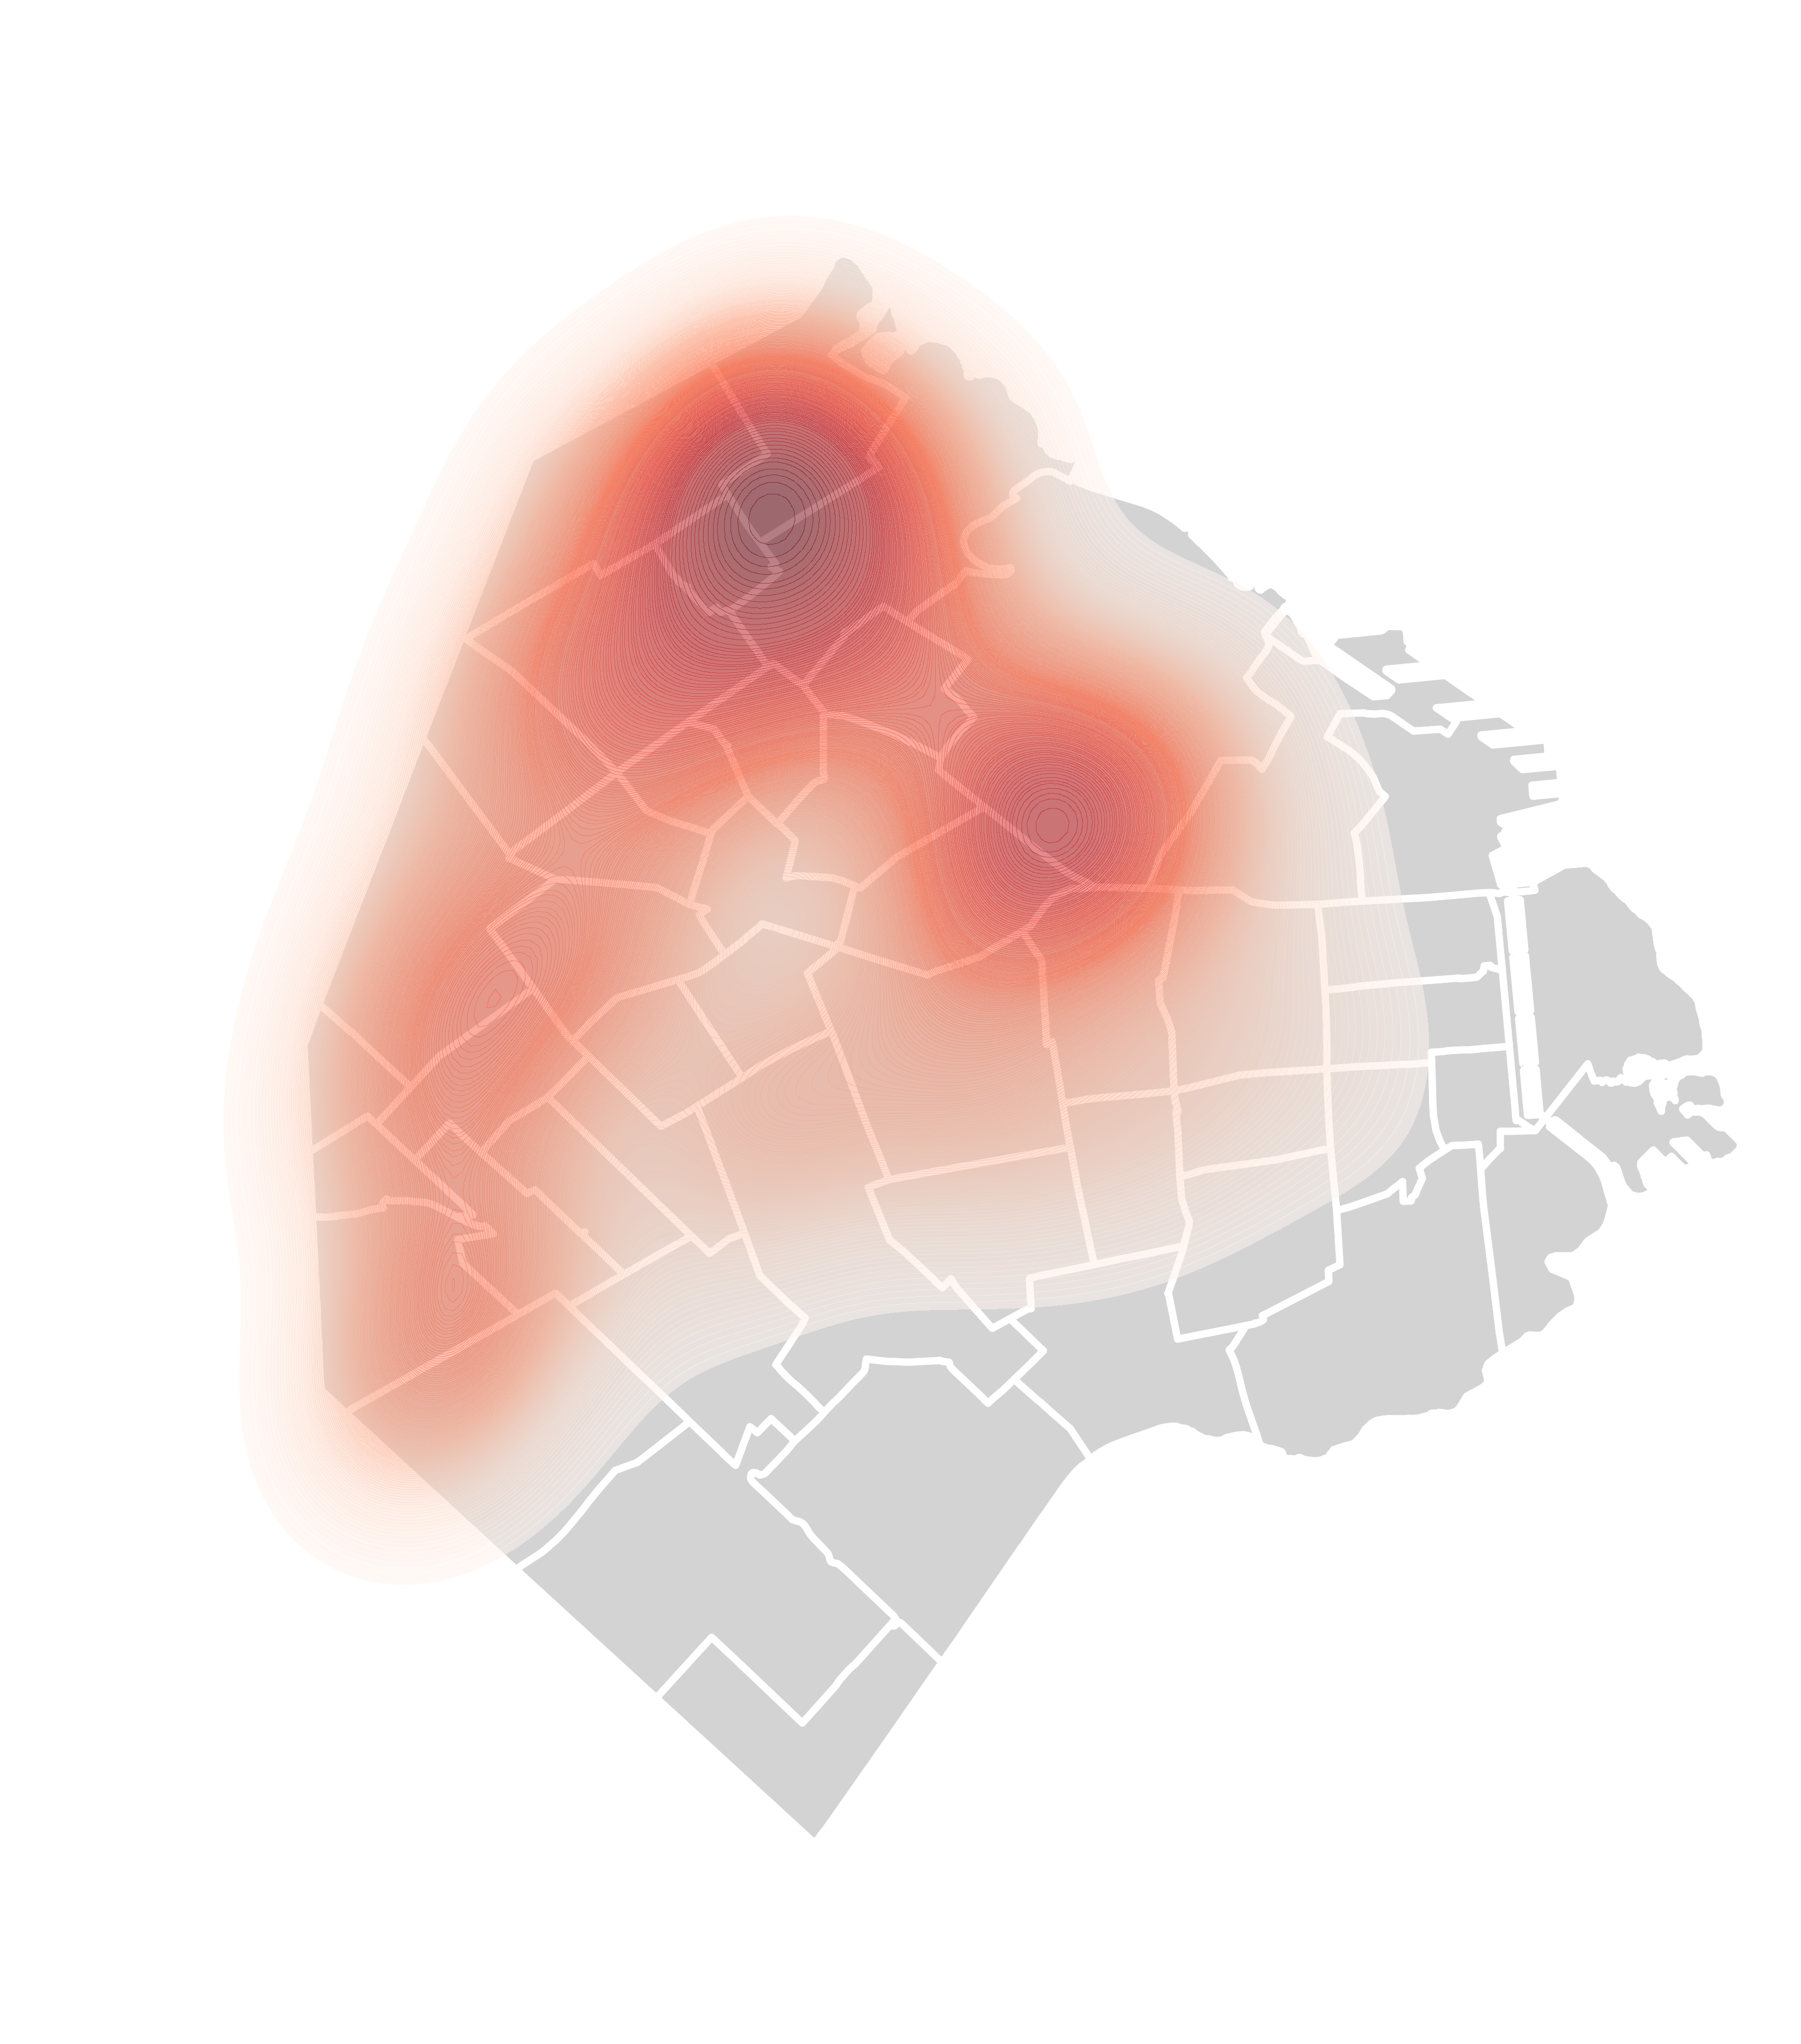

In [82]:
fig, ax = plt.subplots()
fig.set_dpi(900)
sns.set_style("white")
geojson["geometry"].plot(ax=ax, color='lightgrey')
sns.kdeplot(data=clean_df,y="Latitud",x="Longitud",ax=ax, levels=200,
            fill=True,
            alpha=0.5,
            cmap="Reds")
ax.set_axis_off()
plt.show()
#plt.savefig("comercios_hetmap.png",dpi=1000)
